In [1]:
import openturns as ot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from shapley import SobolIndices, SobolKrigingIndices, create_df_from_gp_indices, create_df_from_mc_indices
from shapley.tests import ishigami, ishigami_true_indices, additive_linear
from shapley.plots import set_style_paper, plot_violin, matrix_plot

import time

%load_ext autoreload
%autoreload 2

%matplotlib inline

range(0, 3)
range(0, 3)
range(0, 3)


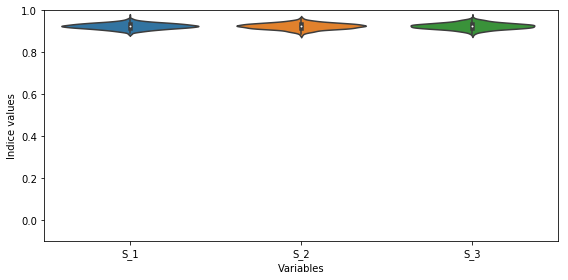

In [105]:
dim = 3
beta = [1., 1., 1.]
model = lambda x: additive_linear(x, beta)
model = additive_linear
margins = [ot.Normal()]*dim
theta_12 = 0.5
theta_13 = 0.8
theta_23 = 0.
sigma = np.identity(dim)
sigma[1, 0] = theta_12
sigma[0, 1] = theta_12
sigma[2, 0] = theta_13
sigma[0, 2] = theta_13
sigma[2, 1] = theta_23
sigma[1, 2] = theta_23
    
copula = ot.NormalCopula(ot.CorrelationMatrix(sigma))
input_distribution = ot.ComposedDistribution(margins, copula)
ot.RandomGenerator.SetSeed(0)
    
max_budget = 10000
n_sample = 10000
n_boot = 1000
ylim = [-0.1, 1.]

sobol = SobolIndices(input_distribution)
sobol.build_uncorrelated_mc_sample(model, n_sample)
#sobol.build_mc_sample(model, n_sample)
first_indices_mc = sobol.compute_uncorrelated_indices(n_boot=n_boot, estimator='mara')
#first_indices_mc = sobol.compute_indices(n_boot=n_boot, estimator='sobol')
df_first_indices_mc = create_df_from_mc_indices(first_indices_mc)
plot_violin(df_first_indices_mc, with_hue=False, ylim=ylim)

In [106]:
first_indices_mc.mean(axis=1)

array([ 0.92575653,  0.92542713,  0.92589132])

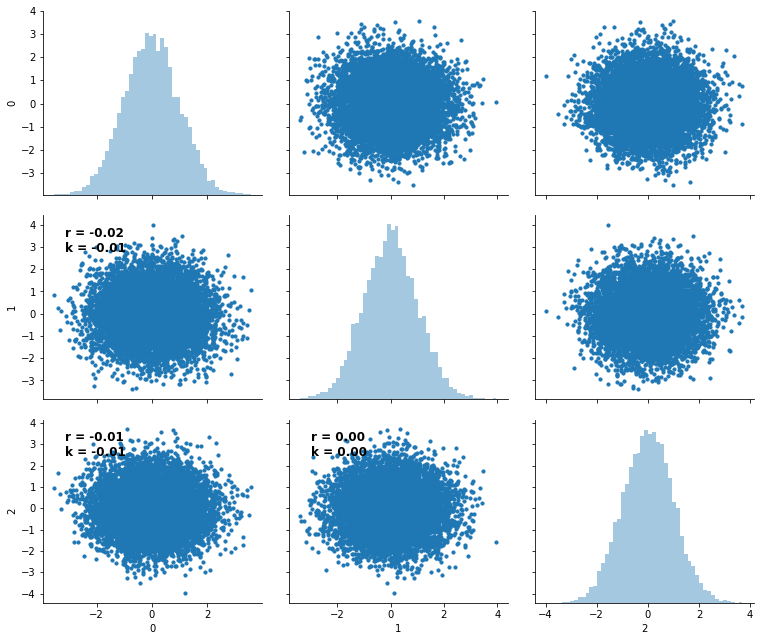

In [112]:
matrix_plot(sobol.debug_U_3_i)

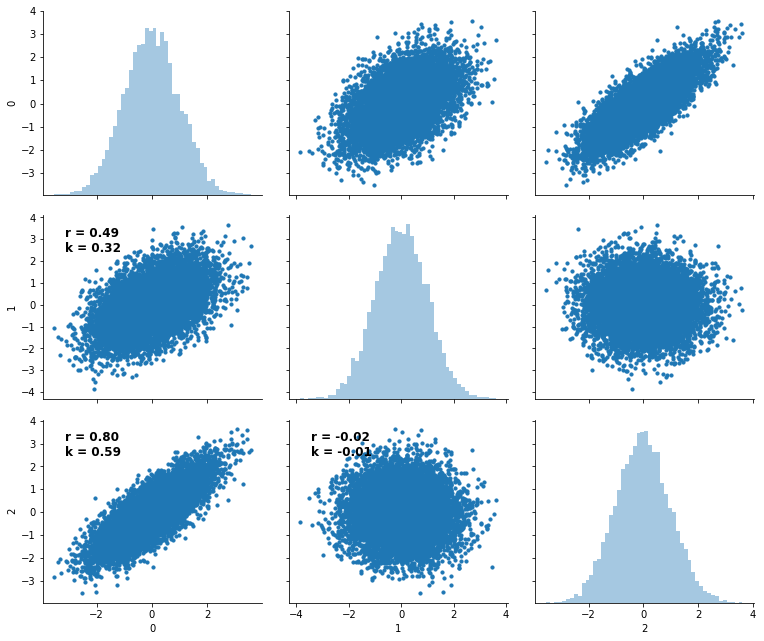

In [111]:
matrix_plot(sobol.debug_X_3_i)

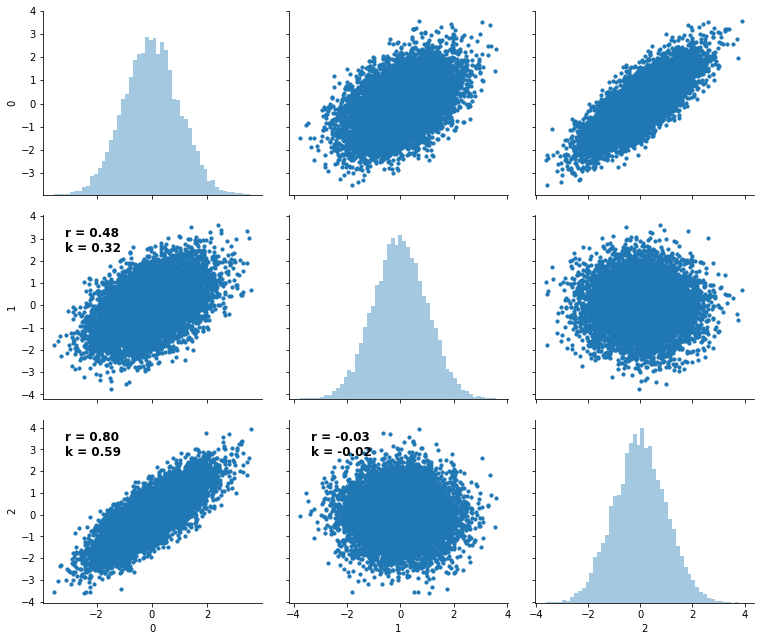

In [110]:
matrix_plot(sobol.debug_X_1_i)

C:\Users\naz-probook\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\naz-probook\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


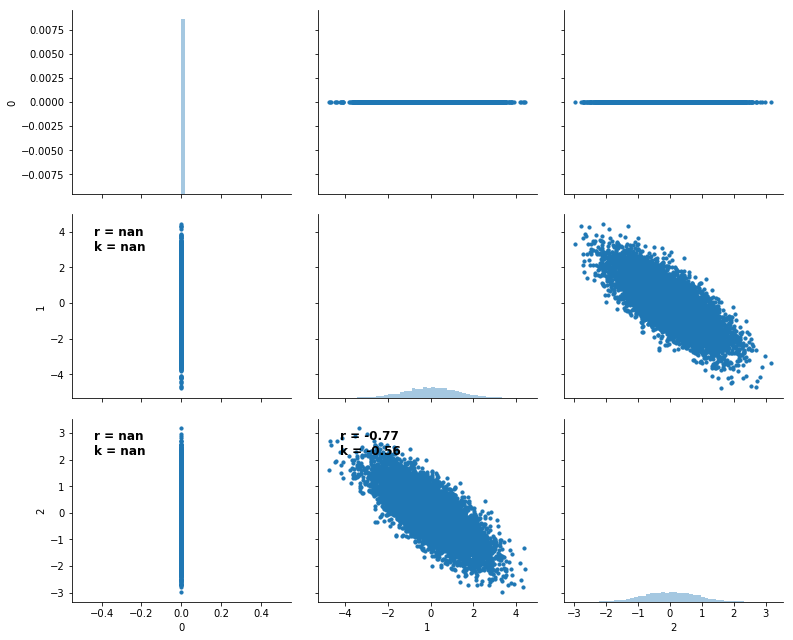

In [113]:
matrix_plot(sobol.debug_X_1_i - sobol.debug_X_3_i)